## Dataset Overview – UNSW-NB15

UNSW-NB15 is a network intrusion detection dataset designed to reflect
realistic enterprise network traffic, including both normal activity
and multiple classes of cyber attacks.

Each record represents a **network flow**, with features describing
protocol behavior, packet statistics, timing information, and connection state.

### Feature Groups

The dataset includes approximately 50 features, which can be broadly
grouped into:
- Flow and packet statistics (bytes, packets, sizes)
- Time-based features (durations, inter-packet timing)
- Protocol and state information
- Aggregated connection counters

### Target Labels

This dataset version provides two target columns:
- **binary_label** – binary intrusion detection target  
  (`0` = normal traffic, `1` = attack)

- **attack_label** – multiclass label indicating the attack category

The binary label is used to study intrusion detection under strong
class imbalance, while the multiclass label enables fine-grained
attack classification.


In [3]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Explicit dataset path
flow_path = (
    "/content/drive/MyDrive/Portfolio datasets/UNSW_Flow.parquet"
)

if not os.path.exists(flow_path):
    raise FileNotFoundError(f"Dataset not found at {flow_path}")

# Load dataset
df = pd.read_parquet(flow_path)

print("Dataset loaded successfully")
print("Shape:", df.shape)
display(df.head())

Dataset loaded successfully
Shape: (2059415, 50)


,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,state,dur,sbytes,dbytes,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_label,binary_label
0,1,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,...,0,3,7,1,3,1,1,1,normal,0
1,2,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,...,0,2,4,2,3,1,1,2,normal,0
2,3,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,...,0,12,8,1,2,2,1,1,normal,0
3,4,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,...,0,6,9,1,1,1,1,1,normal,0
4,5,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,...,0,7,9,1,1,1,1,1,normal,0


=== Dataset Shape ===
(2059415, 50)

=== First Rows ===


,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,state,dur,sbytes,dbytes,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_label,binary_label
0,1,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,...,0,3,7,1,3,1,1,1,normal,0
1,2,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,...,0,2,4,2,3,1,1,2,normal,0
2,3,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,...,0,12,8,1,2,2,1,1,normal,0
3,4,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,...,0,6,9,1,1,1,1,1,normal,0
4,5,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,...,0,7,9,1,1,1,1,1,normal,0



=== Column List ===
flow_id, source_ip, source_port, destination_ip, destination_port, protocol, state, dur, sbytes
dbytes, sttl, dttl, sloss, dloss, service, sload, dload, spkts
dpkts, swin, dwin, stcpb, dtcpb, smeansz, dmeansz, trans_depth, res_bdy_len
sjit, djit, stime, ltime, sintpkt, dintpkt, tcprtt, synack, ackdat
is_sm_ips_ports, ct_state_ttl, ct_flw_http_mthd, is_ftp_login, ct_ftp_cmd, ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm
ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, attack_label, binary_label

Binary label column: binary_label
Multiclass label column: attack_label

=== Binary Label Distribution ===
binary_label
0    1959772
1      99643
Name: count, dtype: Int64

=== Binary Label Distribution (%) ===
binary_label
0    95.16
1     4.84
Name: proportion, dtype: Float64

=== Multiclass Attack Label Distribution ===
attack_label
normal            1959772
exploits            27599
generic             25378
fuzzers             21795
reconnaissance      13357
dos    

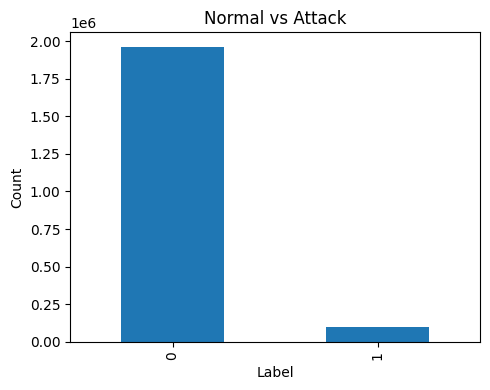


=== Class Imbalance Summary ===
Normal traffic: 95.16%
Attack traffic: 4.84%

=== Columns with Missing Values ===
Count: 2
is_ftp_login        0.492453
ct_flw_http_mthd    0.453334
dtype: float64

=== Feature Types ===
Int64             34
Float64           10
string[python]     6
Name: count, dtype: int64

=== Example Categorical Columns ===



In [13]:
# ============================================================
# UNSW-NB15 Dataset Familiarization
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Basic overview
# ------------------------------------------------------------
print("=== Dataset Shape ===")
print(df.shape)

print("\n=== First Rows ===")
display(df.head())

print("\n=== Column List ===")
cols = df.columns.tolist()
n_lines = 6
chunk_size = (len(cols) + n_lines - 1) // n_lines

for i in range(0, len(cols), chunk_size):
    print(", ".join(cols[i:i + chunk_size]))

# ------------------------------------------------------------
# Target columns
# ------------------------------------------------------------
binary_label_col = "binary_label"
multiclass_label_col = "attack_label"

print(f"\nBinary label column: {binary_label_col}")
print(f"Multiclass label column: {multiclass_label_col}")

# ------------------------------------------------------------
# Target analysis
# ------------------------------------------------------------
print("\n=== Binary Label Distribution ===")
print(df[binary_label_col].value_counts())

print("\n=== Binary Label Distribution (%) ===")
print((df[binary_label_col].value_counts(normalize=True) * 100).round(2))

print("\n=== Multiclass Attack Label Distribution ===")
print(df[multiclass_label_col].value_counts())

# Visualization
plt.figure(figsize=(5, 4))
df[binary_label_col].value_counts().plot(kind="bar", title="Normal vs Attack")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Class imbalance
# ------------------------------------------------------------
print("\n=== Class Imbalance Summary ===")
normal_pct = (df[binary_label_col] == 0).mean() * 100
attack_pct = (df[binary_label_col] == 1).mean() * 100
print(f"Normal traffic: {normal_pct:.2f}%")
print(f"Attack traffic: {attack_pct:.2f}%")

# ------------------------------------------------------------
# Missing values
# ------------------------------------------------------------
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio = missing_ratio[missing_ratio > 0]

print("\n=== Columns with Missing Values ===")
print(f"Count: {len(missing_ratio)}")
print(missing_ratio.head(10))

# ------------------------------------------------------------
# Feature types
# ------------------------------------------------------------
print("\n=== Feature Types ===")
print(df.dtypes.value_counts())

print("\n=== Example Categorical Columns ===")
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(", ".join(categorical_cols[:10]))


## Observations

- The dataset contains ~2.06M network flow records with 50 features, reflecting
  large-scale, real-world traffic volumes.

- Binary labels are highly imbalanced (~95% normal vs. ~5% attack), which mirrors
  production SOC environments and requires metrics beyond accuracy.

- Attack traffic is distributed across multiple categories, with a long tail of
  rare attack types (e.g., worms, shellcode).

- Only two features contain missing values, both related to application-layer
  behavior, indicating partial protocol visibility rather than data corruption.

- Feature types are predominantly numerical, with a small number of categorical
  fields requiring encoding.
